In [1]:
%load_ext autoreload
%autoreload 2

import os
import torch
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader
from pytorch_lightning import Trainer, seed_everything
os.chdir("/nfs/students/winter-term-2020/project-4/schwienb/project-4")
from src.data.mnist import MNISTDataModule
from src.data.fashionmnist import FashionMNISTDataModule
from src.models.vae.basic_vae_variance import BasicVAEVariance
from src.experiments.experiment import Experiment
import torch.nn.functional as F
from pytorch_lightning.callbacks import LearningRateMonitor

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
seed_everything(42)

42

In [44]:
exp = Experiment('VAEVariance_FashionMNIST_PDF_1')
exp.load()


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


In [45]:
mnist = MNISTDataModule()
fashion = FashionMNISTDataModule()

mnist.prepare_data()
mnist.setup()

fashion.prepare_data()
fashion.setup()
mnist_test = mnist.test_dataloader()
fashion_test = fashion.test_dataloader()



In [5]:
from src.utils.vae import generate_images

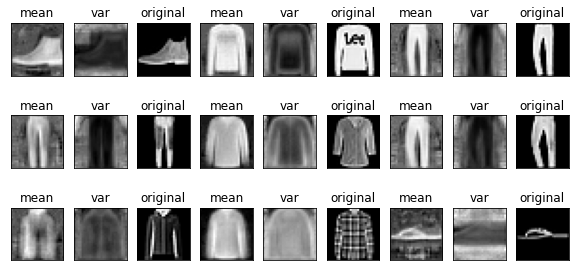

In [6]:
generate_images(exp.model, exp.dataset.test_dataloader())

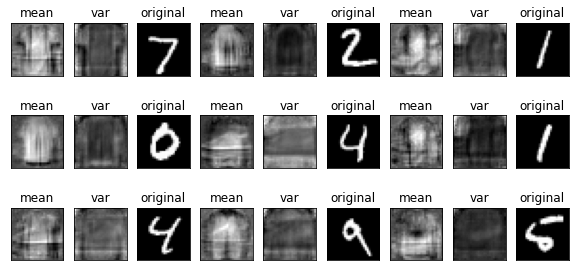

In [7]:
generate_images(exp.model, mnist_test)

In [46]:
idd_result = exp.trainer.test(exp.model, test_dataloaders=[fashion_test], verbose=False)

Set SLURM handle signals.


In [47]:
ood_result = exp.trainer.test(exp.model, test_dataloaders=[mnist_test], verbose=False)

Set SLURM handle signals.


In [48]:
idd_losses = torch.Tensor(list(map(lambda x: x['test_loss'], idd_result))).numpy() 
ood_losses = torch.Tensor(list(map(lambda x: x['test_loss'], ood_result))).numpy() 

In [49]:
idd_losses2 = idd_losses
ood_losses2 = ood_losses

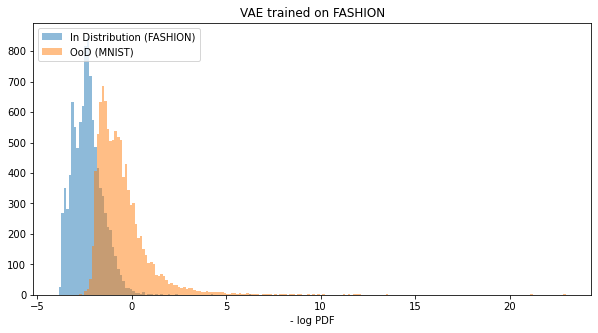

In [54]:
plt.figure(figsize=(10,5))
bins = np.histogram(np.hstack((idd_losses, ood_losses)), bins=200)[1]
plt.hist(idd_losses, bins, alpha=0.5, label='In Distribution (FASHION)')
plt.hist(ood_losses, bins, alpha=0.5, label='OoD (MNIST)')
plt.legend(loc='upper left')
plt.xlabel('- log PDF')
plt.title('VAE trained on FASHION')
plt.show()

In [51]:
from src.utils.ood_test import plot_roc_auc

In [52]:
targets = np.concatenate(
    (np.zeros(len(idd_losses)), np.ones(len(ood_losses))))
results = np.concatenate((idd_losses, ood_losses))

 ROC AUC=0.92412


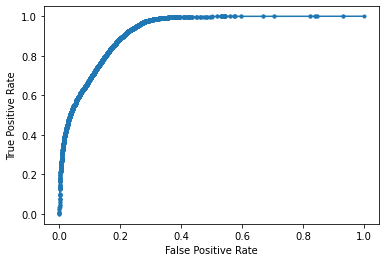

In [53]:
plot_roc_auc(targets, results)